<a href="https://colab.research.google.com/github/yousef-taheri/Projects/blob/master/dimension%20Reduct/dimensionRedcut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
Golub_X = pd.read_csv('data/Golub_X',sep=' ') # Observations
Golub_y = pd.read_csv('data/Golub_y',sep=' ') # Classes
Golub_y=Golub_y.values.squeeze()

X = pd.read_csv('data/Breast.txt',sep=' ')
Breast_y = X.values[:,30] # Classes
Breast_y=Breast_y==1
Breast_X = X.values[:,0:29] # Observations

In [ ]:
def PCA_fit_plot(X,y):
  pca = PCA(n_components=2)
  pca.fit(X)
  X_pca = pca.transform(X)
  plt.scatter(X_pca[:, 0], X_pca[:, 1],marker='o', c=y,s=25, edgecolor='k')
  plt.show()

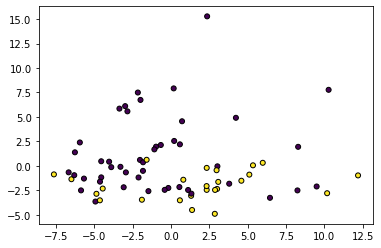

In [ ]:
PCA_fit_plot(Golub_X,Golub_y)

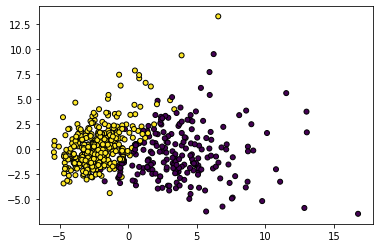

In [ ]:
PCA_fit_plot(Breast_X,Breast_y)

In [ ]:

def kerPca_fit_plot(X,y):
  transformer = KernelPCA(n_components=2, kernel='linear')
  X_pca = transformer.fit_transform(X)
  plt.scatter(X_pca[:, 0], X_pca[:, 1],marker='o', c=y,s=25, edgecolor='k')
  plt.show()

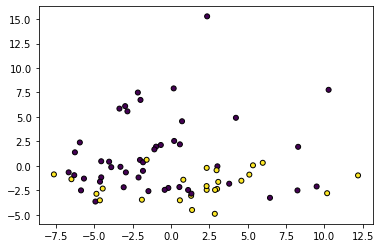

In [ ]:
kerPca_fit_plot(Golub_X,Golub_y)

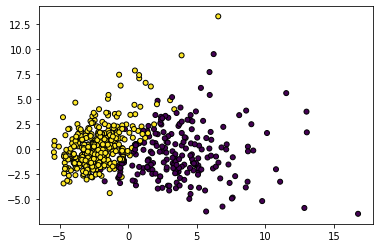

In [ ]:
kerPca_fit_plot(Breast_X,Breast_y)

In [ ]:

def IcrementalPca_fit_plot(X,y):
  transformer = IncrementalPCA(n_components=2, batch_size=100)
  X_pca = transformer.fit_transform(X)
  plt.scatter(X_pca[:, 0], X_pca[:, 1],marker='o', c=y,s=25, edgecolor='k')
  plt.show()

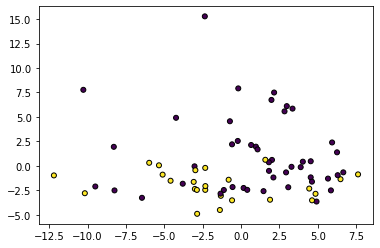

In [ ]:
IcrementalPca_fit_plot(Golub_X,Golub_y)

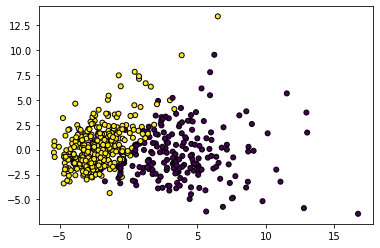

In [ ]:
IcrementalPca_fit_plot(Breast_X,Breast_y)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

def fitPca_accuracy(X,y):

  componnt=[2,5,10,20]
  acc=[]
  for c in componnt:

    pca = PCA(n_components=c)
    pca.fit(X)
    X_pca = pca.transform(X)

    svcModel=svm.SVC()
    svcModel.fit(X_pca,y)


    logreg=LogisticRegression()
    logreg.fit(X_pca,y)

    acc.append((svcModel.score(X_pca,y),logreg.score(X_pca,y)))
  plt.plot(componnt,acc)
  plt.legend(["svm","logreg"])
  plt.show()
  return acc

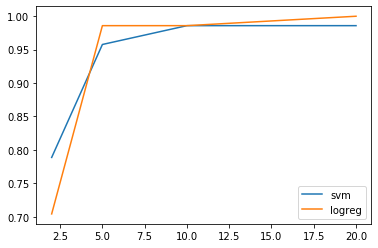

[(0.7887323943661971, 0.704225352112676),
 (0.9577464788732394, 0.9859154929577465),
 (0.9859154929577465, 0.9859154929577465),
 (0.9859154929577465, 1.0)]

In [ ]:
fitPca_accuracy(Golub_X,Golub_y)

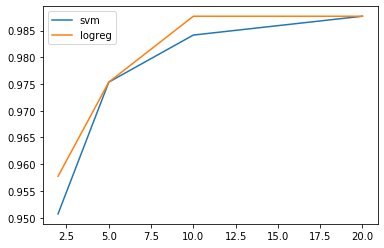

[(0.9507042253521126, 0.9577464788732394),
 (0.9753521126760564, 0.9753521126760564),
 (0.9841549295774648, 0.9876760563380281),
 (0.9876760563380281, 0.9876760563380281)]

In [ ]:
fitPca_accuracy(Breast_X,Breast_y)

In [ ]:
def Pca_Lda_compare(X,y):
  print("WARNING")
  print('''lda works when thaere are more than 2 features''')
  target_names = ["0","1"]

  pca = PCA(n_components=2)
  X_r = pca.fit(X).transform(X)

  lda = LinearDiscriminantAnalysis(n_components=2)
  X_r2 = lda.fit(X, y).transform(X)
  #Xvvv=lda.fit_transform(Golub_X,y)

  plt.figure()
  colors = ['navy', 'turquoise']
  lw = 2

  for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title('PCA')

  plt.figure()
  for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 0], alpha=.8, color=color,
                label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title('LDA')

  plt.show()

WARNING
lda works when thaere are more than 2 features


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3562, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


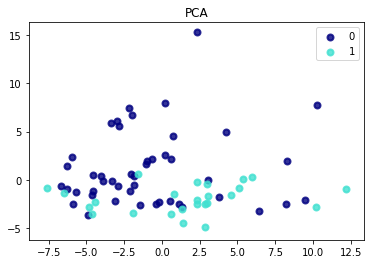

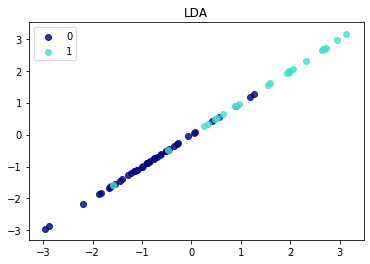

In [ ]:
Pca_Lda_compare(Golub_X,Golub_y)

WARNING
lda works when thaere are more than 2 features


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(29, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


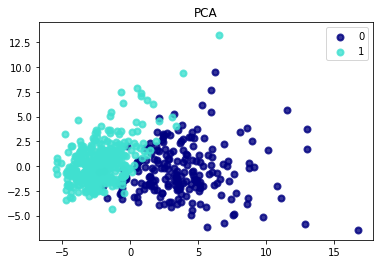

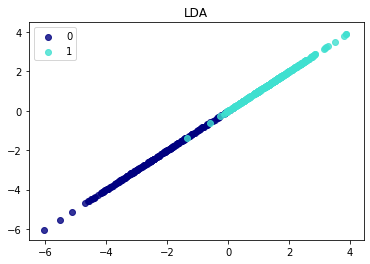

In [ ]:
Pca_Lda_compare(Breast_X,Breast_y)

In [ ]:
print("breast cancer dataset is easier for prediction")

breast cancer dataset is easier for prediction


In [ ]:

def fitPca_Error(X,y):

  componnt=[2,5,10,20]
  err=[]
  for c in componnt:

    pca = PCA(n_components=c)
    pca.fit(X)
    X_pca = pca.transform(X)

    svcModel=svm.SVC()
    svcModel.fit(X_pca,y)


    logreg=LogisticRegression()
    logreg.fit(X_pca,y)

    err.append((1-svcModel.score(X_pca,y),1-logreg.score(X_pca,y)))

  svcModel=svm.SVC()
  svcModel.fit(X,y)

  logreg=LogisticRegression()
  logreg.fit(X,y)

  err.append((1-svcModel.score(X,y),1-logreg.score(X,y)))
  componnt.append(100)

  plt.plot(componnt,err)
  plt.title("error rate")
  plt.legend(["svm","logreg"])
  plt.show()
  return err

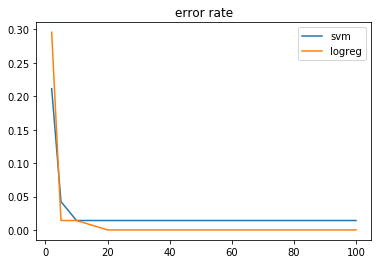

[(0.21126760563380287, 0.295774647887324),
 (0.04225352112676062, 0.014084507042253502),
 (0.014084507042253502, 0.014084507042253502),
 (0.014084507042253502, 0.0),
 (0.014084507042253502, 0.0)]

In [ ]:
fitPca_Error(Golub_X,Golub_y)

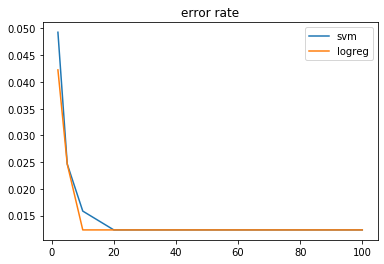

[(0.04929577464788737, 0.04225352112676062),
 (0.02464788732394363, 0.02464788732394363),
 (0.015845070422535246, 0.01232394366197187),
 (0.01232394366197187, 0.01232394366197187),
 (0.01232394366197187, 0.01232394366197187)]

In [ ]:
fitPca_Error(Breast_X,Breast_y)

In [ ]:
print("error rates of reduced data are not smaller but they are competing with the full model")

error rates of reduced data are not smaller but they are competing with the full model
